<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/Curva_Aprendizaje_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de curva de aprendizaje con Keras

## Objetivo del ejercicio
Entrenar una red neuronal sobre un conjunto de datos sintético y visualizar la curva de aprendizaje, analizando la evolución de la pérdida (loss) en los conjuntos de entrenamiento y validación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Paso 1: generar y preparar el conjunto de datos

In [2]:
# Crear datos sintéticos de regresión
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

# División en entrenamiento, validación y prueba
X_train_full, X_val_test, y_train_full, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

## Paso 2: construir el modelo con Keras

In [3]:
# Definición de una red neuronal simple
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Paso 3: entrenar el modelo y guardar el historial

In [4]:
# Entrenamiento con validación
history = model.fit(X_train_full, y_train_full,
                    validation_data=(X_val, y_val),
                    epochs=50, verbose=0)

## Paso 4: visualizar la curva de aprendizaje

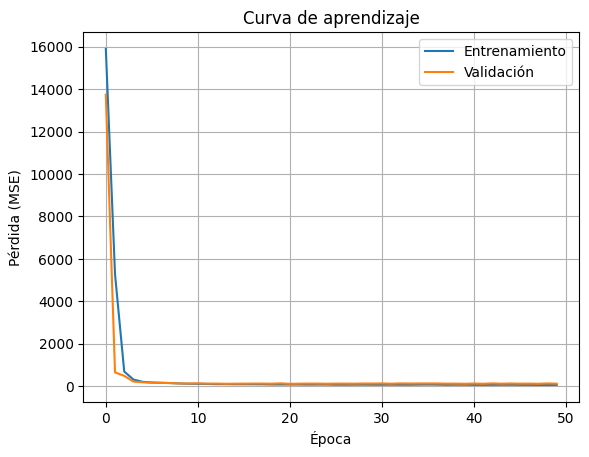

In [5]:
# Gráfica de la pérdida por época
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

Esta curva de aprendizaje corresponde a un modelo bien ajustado. El comportamiento indica:

* Aprendizaje efectivo en las primeras etapas.

* Ausencia de sobreajuste (no hay aumento en la pérdida de validación).

* Ausencia de subajuste (la pérdida no se mantiene alta).

* Desempeño estable a través de las épocas.

Este tipo de patrón es deseable en tareas de regresión o clasificación, y puede tomarse como referencia visual para evaluar el entrenamiento de otros modelos en comparación.

## Interpretación de la curva
- Si la **pérdida de validación** disminuye al mismo ritmo que la de entrenamiento, el modelo está aprendiendo de manera generalizable.
- Si la pérdida de entrenamiento disminuye pero la de validación se estabiliza o aumenta, el modelo está probablemente **sobreajustando**.
- Si ambas pérdidas permanecen altas, podría tratarse de **subajuste**.

## Recomendaciones
- Experimente variando el número de épocas, tamaño de la red o tasa de aprendizaje.
- Active `verbose=1` en `model.fit` para observar el progreso por época.
- Guarde el historial con `history.history` para análisis posterior o comparación entre modelos.